<a href="https://colab.research.google.com/github/pedrohcmds/an-lise-de-dados-da-vacina-o/blob/main/notebooks/analise-da-vacinacao-eua-e-china.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 e a crise da ordem liberal: Análise de dados da vacinação

Por Pedro Henrique Campagna Moura da SIlva

## Importando bibliotecas

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Importando os dados e verificando o tamanho dos datasets

In [6]:
eua = pd.read_csv('United States.csv')
eua.shape

(198, 7)

### Verificando o dataset dos Estados Unidos

In [7]:
eua.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,United States,2020-12-20,Pfizer/BioNTech,https://www.cdc.gov/coronavirus/2019-ncov/vacc...,556208,556208.0,NaN
1,United States,2020-12-21,Pfizer/BioNTech,https://covid.cdc.gov/covid-data-tracker/#vacc...,614117,614117.0,NaN
2,United States,2020-12-23,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,1008025,1008025.0,NaN
3,United States,2020-12-26,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,1944585,1944585.0,NaN
4,United States,2020-12-28,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,2127143,2127143.0,NaN


In [103]:
eua.dtypes

location                    object
date                        object
vaccine                     object
source_url                  object
total_vaccinations           int64
people_vaccinated          float64
people_fully_vaccinated    float64
dtype: object

### Verificando o dataset da China

In [8]:
china = pd.read_csv('China.csv')
china.shape

(134, 7)

In [9]:
china.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,China,2020-12-15,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",https://www.globaltimes.cn/page/202012/1211515...,1500000,NaN,NaN
1,China,2020-12-31,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",https://www.globaltimes.cn/page/202012/1211515...,4500000,NaN,NaN
2,China,2021-01-09,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",http://www.scio.gov.cn/xwfbh/xwbfbh/wqfbh/4468...,9000000,NaN,NaN
3,China,2021-01-13,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",https://www.chinadaily.com.cn/a/202101/13/WS5f...,10000000,NaN,NaN
4,China,2021-01-20,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",https://www.globaltimes.cn/page/202101/1213364...,15000000,NaN,NaN


### Verificando as colunas nos dois DataFrames

In [10]:
eua.columns.values 

array(['location', 'date', 'vaccine', 'source_url', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated'], dtype=object)

In [11]:
eua.columns.values == china.columns.values

array([ True,  True,  True,  True,  True,  True,  True])

## Limpeza de dados

### Selecionando as colunas desejadas para os DataFrames

In [12]:
eua_limpo = eua.drop(columns=['people_vaccinated','people_fully_vaccinated'])
eua_limpo.head()

,location,date,vaccine,source_url,total_vaccinations
0,United States,2020-12-20,Pfizer/BioNTech,https://www.cdc.gov/coronavirus/2019-ncov/vacc...,556208
1,United States,2020-12-21,Pfizer/BioNTech,https://covid.cdc.gov/covid-data-tracker/#vacc...,614117
2,United States,2020-12-23,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,1008025
3,United States,2020-12-26,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,1944585
4,United States,2020-12-28,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,2127143


In [13]:
china_limpo = china.drop(columns=['people_vaccinated','people_fully_vaccinated'])
china_limpo.head()

,location,date,vaccine,source_url,total_vaccinations
0,China,2020-12-15,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",https://www.globaltimes.cn/page/202012/1211515...,1500000
1,China,2020-12-31,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",https://www.globaltimes.cn/page/202012/1211515...,4500000
2,China,2021-01-09,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",http://www.scio.gov.cn/xwfbh/xwbfbh/wqfbh/4468...,9000000
3,China,2021-01-13,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",https://www.chinadaily.com.cn/a/202101/13/WS5f...,10000000
4,China,2021-01-20,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",https://www.globaltimes.cn/page/202101/1213364...,15000000


## Análises

### Estatísticas Descritivas

In [14]:
estatisticas_descritivas_china = china_limpo.describe()
estatisticas_descritivas_china

,total_vaccinations
count,1.340000e+02
mean,5.805918e+08
std,4.783100e+08
min,1.500000e+06
25%,1.728518e+08
50%,3.999625e+08
75%,9.843558e+08
max,1.491605e+09


In [15]:
estatisticas_descritivas_eua = eua_limpo.describe()
estatisticas_descritivas_eua

,total_vaccinations
count,1.980000e+02
mean,1.788191e+08
std,1.176467e+08
min,5.562080e+05
25%,6.336234e+07
50%,1.883696e+08
75%,2.960354e+08
max,3.391029e+08


In [16]:
estatisticas_descritivas_eua['total_vacinations_china'] = estatisticas_descritivas_china.total_vaccinations
analises_descritivas = estatisticas_descritivas_eua.rename(columns={'total_vaccinations':'total_vaccinations_eua'})
analises_descritivas

,total_vaccinations_eua,total_vacinations_china
count,1.980000e+02,1.340000e+02
mean,1.788191e+08,5.805918e+08
std,1.176467e+08,4.783100e+08
min,5.562080e+05,1.500000e+06
25%,6.336234e+07,1.728518e+08
50%,1.883696e+08,3.999625e+08
75%,2.960354e+08,9.843558e+08
max,3.391029e+08,1.491605e+09


In [17]:
analises_descritivas['diff'] = analises_descritivas.total_vaccinations_eua - analises_descritivas.total_vacinations_china
analises_descritivas

,total_vaccinations_eua,total_vacinations_china,diff
count,1.980000e+02,1.340000e+02,6.400000e+01
mean,1.788191e+08,5.805918e+08,-4.017728e+08
std,1.176467e+08,4.783100e+08,-3.606633e+08
min,5.562080e+05,1.500000e+06,-9.437920e+05
25%,6.336234e+07,1.728518e+08,-1.094894e+08
50%,1.883696e+08,3.999625e+08,-2.115929e+08
75%,2.960354e+08,9.843558e+08,-6.883204e+08
max,3.391029e+08,1.491605e+09,-1.152502e+09


## Plotando Gráficos

### Total de vacinações

In [66]:
total_vaccinations_china = china_limpo.total_vaccinations.sum()
total_vaccinations_eua = eua_limpo.total_vaccinations.sum()

In [81]:
total_vaccinations = [{"EUA": total_vaccinations_eua, "China": total_vaccinations_china}]
total_vaccinations

[{'China': 77799302700, 'EUA': 35406172188}]

In [129]:
total_vaccinations = pd.Series(index=['China','EUA'])
total_vaccinations['China'] = total_vaccinations_china
total_vaccinations['EUA'] = total_vaccinations_eua
total_vaccinations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


China    7.779930e+10
EUA      3.540617e+10
dtype: float64

Text(0.5, 1.0, 'Quantidade total de vacinações')

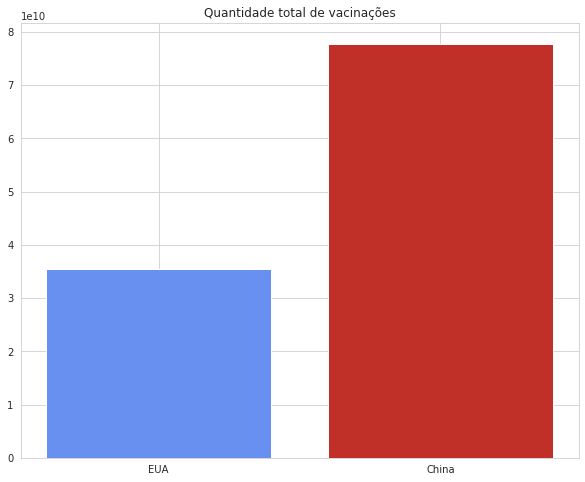

In [165]:
x = ['EUA', 'China']
y =[total_vaccinations_eua, total_vaccinations_china]
ax = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.bar(x[0], y[0], color='#6890F0')
ax.bar(x[1], y[1], color ='#C03028')
ax.set_title('Quantidade total de vacinações')

### Vacinações no tempo

### Verificação temporal 

In [61]:
(china_limpo.loc[0].date, china_limpo.iloc[-1].date)

('2020-12-15', '2021-07-21')

In [62]:
(eua_limpo.loc[0].date, eua_limpo.iloc[-1].date)

('2020-12-20', '2021-07-21')

In [114]:
china_limpo.date = pd.to_datetime(china_limpo.date)
eua_limpo.date = pd.to_datetime(eua_limpo.date)


### Início dos Gráficos

In [38]:
sns.set_style("whitegrid")

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

Extração e análise da parte chinesa

[Text(0, 0.5, 'Vacinações '),
 Text(0.5, 0, 'Tempo'),
 Text(0.5, 1.0, 'Vacinações na China em função do tempo')]

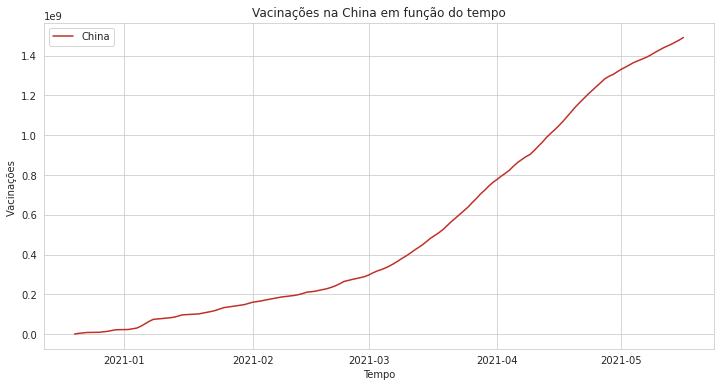

In [150]:
ax = plt.figure(figsize=(12,6))
ax = sns.lineplot(x=eua_limpo.date, y=china_limpo.total_vaccinations, data=china_limpo, label='China', color='#C03028')
ax.set(xlabel='Tempo', ylabel='Vacinações ',title='Vacinações na China em função do tempo')

In [148]:
china_limpo['aumento'] = china_limpo['total_vaccinations'].diff()

[Text(0, 0.5, 'Aumento das vacinações '),
 Text(0.5, 0, 'Tempo'),
 Text(0.5, 1.0, 'Aumento das vacinações chinesas em função do tempo')]

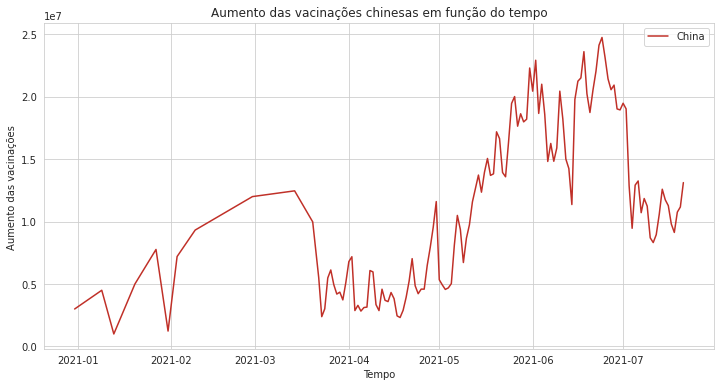

In [155]:
ax = plt.figure(figsize=(12,6))
ax = sns.lineplot(x=china_limpo.date, y=china_limpo.aumento, data=china_limpo, label='China', color='#C03028')
ax.set(xlabel='Tempo', ylabel='Aumento das vacinações ',title='Aumento das vacinações chinesas em função do tempo')

### Estração e Análise da parte estadunidense

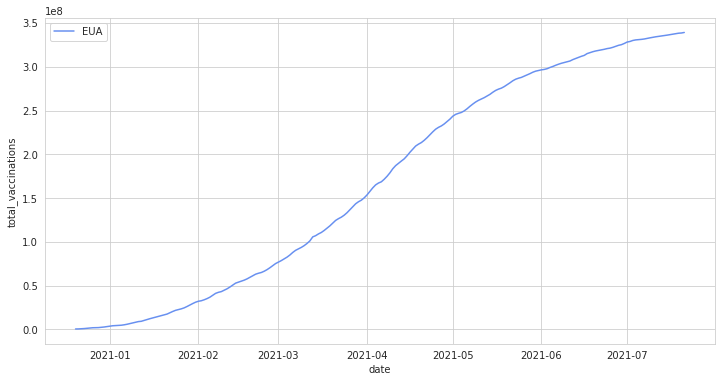

In [123]:
ax = plt.figure(figsize=(12,6))
ax = sns.lineplot(x=eua_limpo.date, y=eua_limpo.total_vaccinations, data=eua_limpo, label='EUA', color='#6890F0')

In [153]:
eua_limpo['aumento'] = eua_limpo['total_vaccinations'].diff()

[Text(0, 0.5, 'Aumento das vacinações '),
 Text(0.5, 0, 'Tempo'),
 Text(0.5, 1.0, 'Aumento das vacinações americanas em função do tempo')]

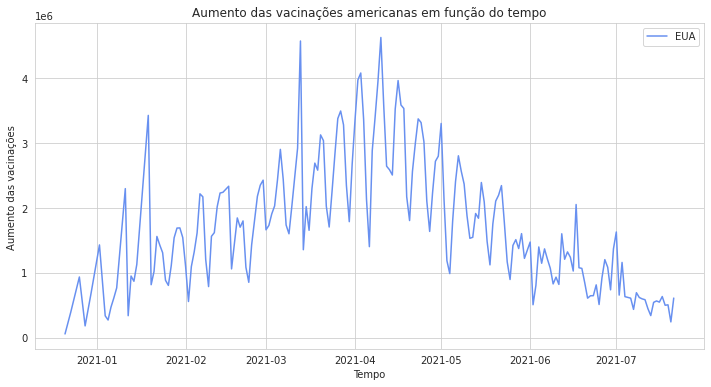

In [158]:
ax = plt.figure(figsize=(12,6))
ax = sns.lineplot(x=eua_limpo.date, y=eua_limpo.aumento, data=eua_limpo, label='EUA', color='#6890F0')
ax.set(xlabel='Tempo', ylabel='Aumento das vacinações ',title='Aumento das vacinações americanas em função do tempo')

## Combinando os dois países

[Text(0, 0.5, 'Total de Vacinações'),
 Text(0.5, 0, 'Data'),
 Text(0.5, 1.0, 'Quantidade de Vacinações de China e EUA (2020-12-15, 2021-07-21)')]

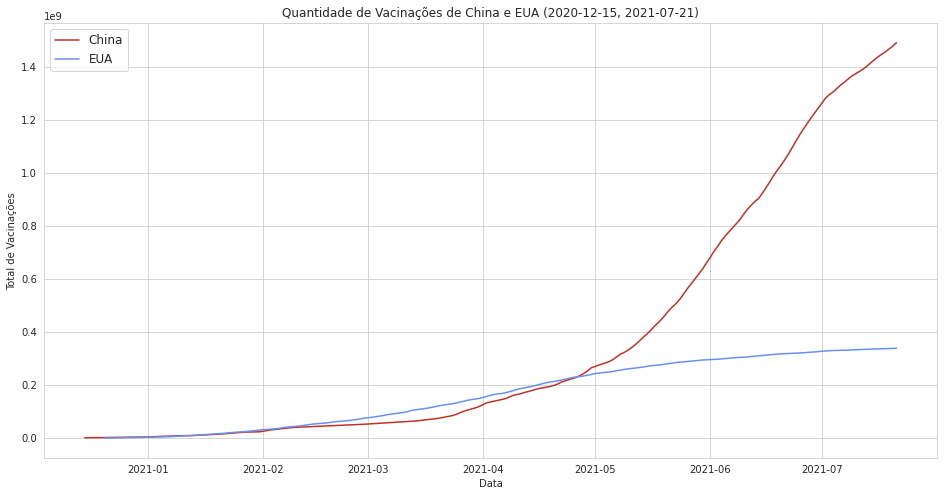

In [171]:
ax = plt.figure(figsize=(16,8))
ax = sns.lineplot(x=china_limpo.date, y=china_limpo.total_vaccinations, data=china_limpo, label='China', color='#C03028')
ax = sns.lineplot(x=eua_limpo.date, y=eua_limpo.total_vaccinations, data=eua_limpo, label='EUA', color='#6890F0')
ax.legend(loc='upper left', fontsize='large')
ax.set(xlabel='Data', ylabel='Total de Vacinações', title='Quantidade de Vacinações de China e EUA (2020-12-15, 2021-07-21)')


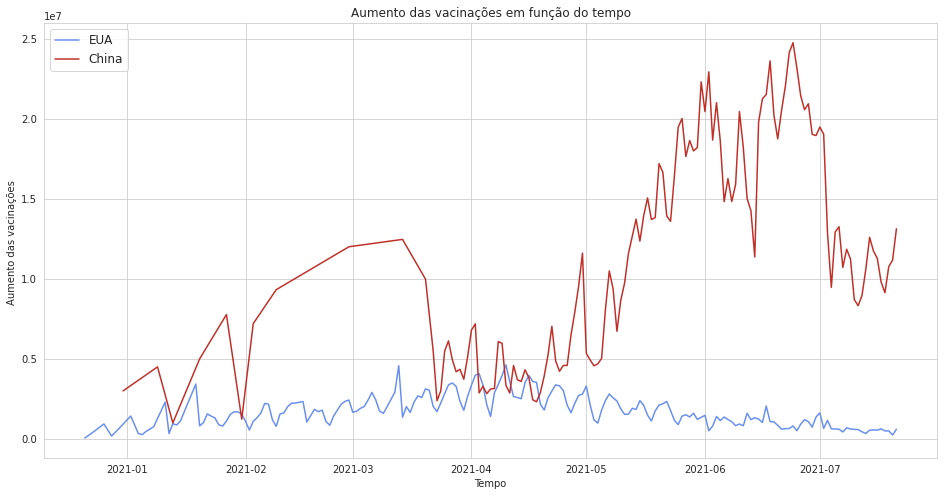

In [174]:
ax = plt.figure(figsize=(16,8))
ax = sns.lineplot(x=eua_limpo.date, y=eua_limpo.aumento, data=eua_limpo, label='EUA', color='#6890F0')
ax = sns.lineplot(x=china_limpo.date, y=china_limpo.aumento, data=china_limpo, label='China', color='#C03028')
ax.set(xlabel='Tempo', ylabel='Aumento das vacinações ',title='Aumento das vacinações em função do tempo')

ax.legend(loc='upper left', fontsize='large')

Vacinas Utilizadas

In [173]:
china_limpo.vaccine.value_counts()

CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac    69
Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac             65
Name: vaccine, dtype: int64

In [110]:
eua_limpo.vaccine.value_counts()

Johnson&Johnson, Moderna, Pfizer/BioNTech    137
Moderna, Pfizer/BioNTech                      59
Pfizer/BioNTech                                2
Name: vaccine, dtype: int64